# Evaluating FiveThirtyEight's Pulitzer Circulation Data with scikit-learn

### Background

This notebook uses Nate Silver's dataset from the 2014 report, 'Pulitzer Prizes Don't Lure Readers.' Silver's methodology evaluates whether the number of Pulitzer prizes won by journalists from given newspapers is related to the change in circulation of these newspapers between 2004 and 2013. Silver finds a weak correlation supported only by the New York Times.

### Methodology

My approach, with linear regression provided by scikit-learn, examines instead the competition between different newspapers within the same years: if awards reflect popularity or vice versa, one would expect correlations within the industry to occur at the same time as well. This correlation is even <i>weaker</i> than the already-weak correlation Silver found, with a completely insignificant R^2 score for the 1990-2003 data and a barely salient one for 2004-2014.

### Conclusions

It is probably safe to conclude that chasing such awards is not a particularly useful business strategy for publishers.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
#Initial imports

In [95]:
df=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/pulitzer/pulitzer-circulation-data.csv')
#read file from HTTPS and make dataframe 
df['Daily Circulation, 2004']=df['Daily Circulation, 2004'].str.replace(',','').astype(int)
df['Daily Circulation, 2013']=df['Daily Circulation, 2013'].str.replace(',','').astype(int)
#recast circulation as integer

Text(0.5, 1.0, 'Total Circulation of Newspapers in 2004 and 2013 (Millions)')

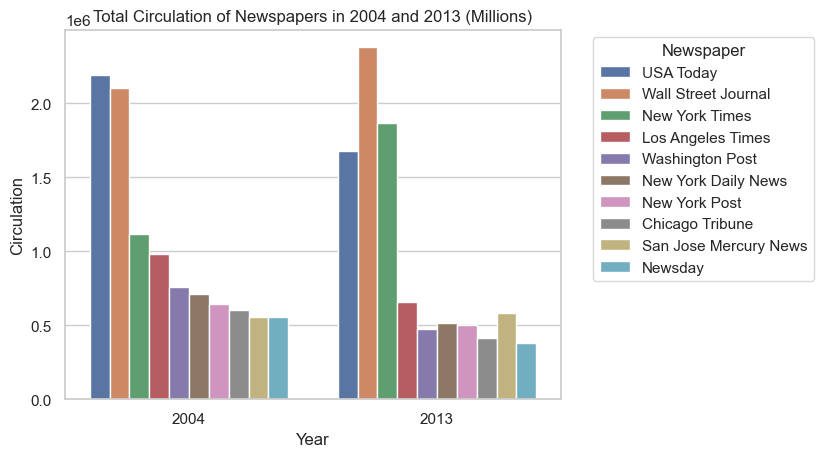

In [72]:
#create barplot showing circulation numbers
top_circ = df.filter(["Newspaper","Daily Circulation, 2004","Daily Circulation, 2013"]).head(10)
top_circ = top_circ.rename(columns={"Daily Circulation, 2004": "2004","Daily Circulation, 2013": "2013"})
sns.set_theme(style="whitegrid")
circ = sns.barplot(data = top_circ.melt("Newspaper", var_name="Year", value_name="Circulation"),
                    x="Year",
                    y="Circulation",
                    hue="Newspaper"
                    )
circ.legend(bbox_to_anchor=(1.05, 1), title = "Newspaper")
circ.set_title("Total Circulation of Newspapers in 2004 and 2013 (Millions)")

In [74]:
#extract prizewinners for 1990-2003 against daily circulation and fit linear regressor
df2003 = df[['Pulitzer Prize Winners and Finalists, 1990-2003','Daily Circulation, 2004']]
X = df2003.iloc[:, 0].values.reshape(-1, 1)  
Y = df2003.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  

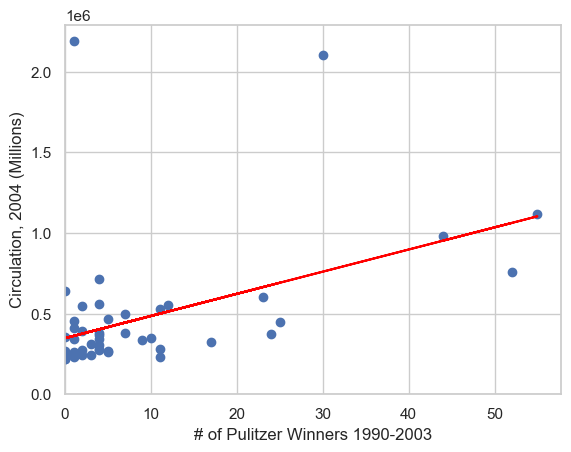

In [78]:
#show linear regression
ax=plt.subplot()
ax.set_xlabel('# of Pulitzer Winners 1990-2003')
ax.set_ylabel('Circulation, 2004 (Millions)')
plt.scatter(X,Y)
ax.plot(X, Y_pred, color='red')
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
plt.show()

In [81]:
#evaluate mean absolute and square error
from sklearn import metrics
mae = metrics.mean_absolute_error(Y, Y_pred)
mse = metrics.mean_squared_error(Y, Y_pred)
r2 = metrics.r2_score(Y, Y_pred)

In [82]:
print("Accuracy of the linear regression:")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R^2 score is {}'.format(r2))
print('There was not a close linear relationship between award winners and circulation during this time')

Accuracy of the linear regression:
--------------------------------------
MAE is 179887.97631387613
MSE is 123464057071.7765
R2 score is 0.19898211081979833
There was not a close linear relationship between award winners and circulation during this time


In [83]:
#same test on 2004-2014 data
df2014 = df[['Pulitzer Prize Winners and Finalists, 2004-2014','Daily Circulation, 2013']]
X2 = df2014.iloc[:, 0].values.reshape(-1, 1)
Y2 = df2014.iloc[:, 1].values.reshape(-1, 1)
linear_regressor2 = LinearRegression()
linear_regressor2.fit(X2, Y2)
Y2_pred = linear_regressor2.predict(X2)

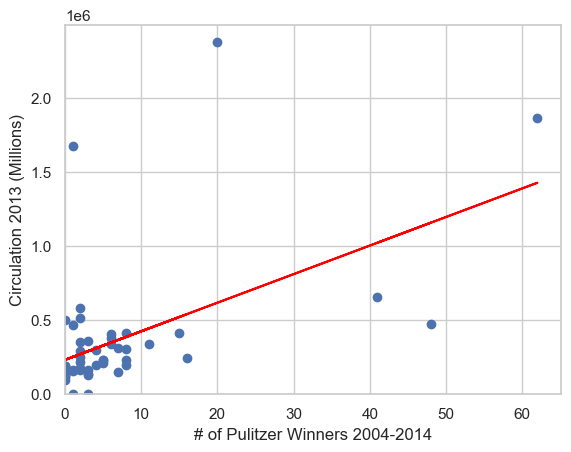

In [89]:
ax2=plt.subplot()
ax2.set_xlabel('# of Pulitzer Winners 2004-2014')
ax2.set_ylabel('Circulation 2013 (Millions)')
plt.scatter(X2,Y2)
ax2.plot(X2, Y2_pred, color='red')
ax2.set_xlim(xmin=0)
ax2.set_ylim(ymin=0)
plt.show()

In [93]:
mae2 = metrics.mean_absolute_error(Y2, Y2_pred)
mse2 = metrics.mean_squared_error(Y2, Y2_pred)
r22 = metrics.r2_score(Y2, Y2_pred)

In [92]:
print("Accuracy of the linear regression:")
print("--------------------------------------")
print('MAE is {}'.format(mae2))
print('MSE is {}'.format(mse2))
print('R^2 score is {}'.format(r22))
print('There was a slightly stronger linear relationship between awards and circulation\nduring this time, though still a weak one, with even greater error')

Accuracy of the linear regression:
--------------------------------------
MAE is 198314.50462940612
MSE is 136306582454.39009
R^2 score is 0.2831371924234817
There was a slightly stronger linear relationship between awards and circulation
during this time, though still a weak one, with even greater error


In [99]:
df.loc[df["Newspaper"] == "New York Times"]
#and based on the specific circulation figures here, 
#we can see that the highly prestigious outlier at the far right of the chart
#is none other than the New York Times, which Silver had identified as the only
#salient beneficiary of the correlation between prestige and popularity

,Newspaper,"Daily Circulation, 2004","Daily Circulation, 2013","Change in Daily Circulation, 2004-2013","Pulitzer Prize Winners and Finalists, 1990-2003","Pulitzer Prize Winners and Finalists, 2004-2014","Pulitzer Prize Winners and Finalists, 1990-2014"
2,New York Times,1119027,1865318,+67%,55,62,117
